In [1]:
#import required packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use("seaborn")

In [2]:
# burger's age vs weight
weight = [10,20.9,30,50,62,65]
age = [8,12,16,25,31.3,34]

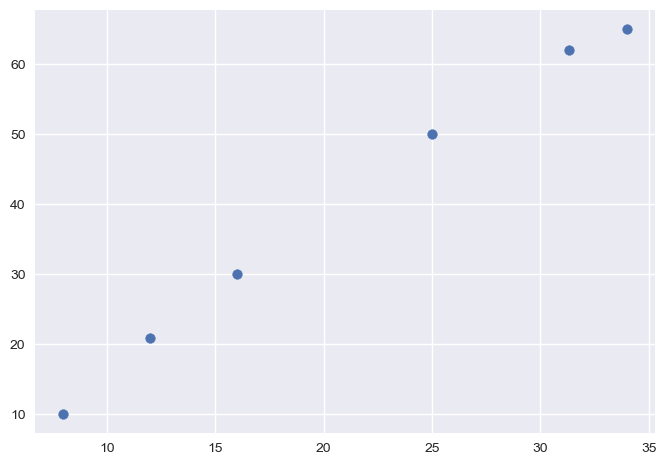

In [3]:
# Plot age vs weight as a scatter plot
plt.scatter(age, weight)
plt.show()

In [4]:
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

In [5]:
# initial guess
p0 = [max(weight), np.median(age),1,min(weight)] # this is an mandatory initial guess

# fit data points to a sigmoid function
popt, pcov = curve_fit(sigmoid, age, weight,p0, method='dogbox')

Method used in curve_fit function - Algorithm to perform minimization.

trf: Trust Region Reflective algorithm, particularly suitable for large sparse problems with bounds. Generally robust method.

dogbox: dogleg algorithm with rectangular trust regions, typical use case is small problems with bounds. Not recommended for problems with rank-deficient Jacobian.

lm: Levenberg-Marquardt algorithm as implemented in MINPACK. Doesn’t handle bounds and sparse Jacobians. Usually the most efficient method for small unconstrained problems.

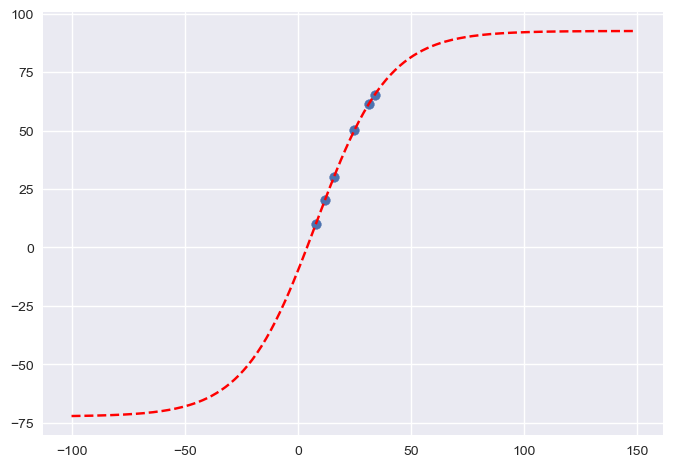

In [6]:
plt.scatter(age, sigmoid(age, popt[0],popt[1],popt[2],popt[3]))
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(-100, 150, 1)
# calculate the output for the range
y_line = sigmoid(x_line, popt[0],popt[1],popt[2],popt[3])
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()